#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
import os
os.environ["WANDB_NOTEBOOK_NAME"] = "my_local_notebook.ipynb"

In [3]:
import wandb
wandb.login(key="3b28632bceb1c80816cd770409e190b2c2ec6841")


wandb: WARNING WANDB_NOTEBOOK_NAME should be a path to a notebook file, couldn't find my_local_notebook.ipynb.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\mudas\_netrc
wandb: Currently logged in as: mudasirrasheed2006 (mudasirrasheed2006-plaksha) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
# Initialize WandB
wandb.init(project="face-detection")

## Reading the image plaksha_Faculty.jpg
img = cv2.imread("Plaksha_Faculty.jpg")

## Check if the image was loaded successfully
if img is None:
    print("Error: Image not found or could not be loaded.")
    wandb.finish()
    exit()

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Applying the face detection method on the grayscale image. 
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

# Log the number of faces detected
wandb.log({"Number of Faces Detected": len(faces_rect)})

# Define the text and font parameters
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0, 0, 255)
font_thickness = 1

# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y - 10), font, font_scale, font_color, font_thickness)

## Display the image
# cv2.imshow(f"Total number of faces detected are {len(faces_rect)}", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Save and log image in WandB
cv2.imwrite("detected_faces.jpg", img)
wandb.log({"Detected Faces Image": wandb.Image("detected_faces.jpg")})

# ✅ Ensure WandB run completes properly
wandb.finish()


Number of Faces Detected,▁
Number of Faces Detected,30


c:\Users\mudas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


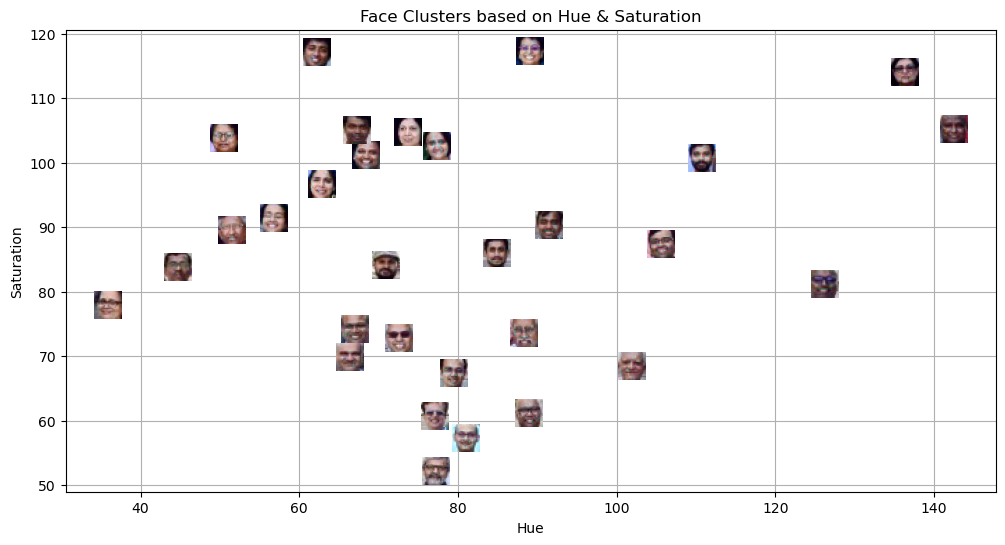

In [6]:

# Initialize WandB
wandb.init(project="face-detection")

# Read the image and convert it from BGR to HSV
img_hsv = cv2.cvtColor(cv2.imread("Plaksha_Faculty.jpg"), cv2.COLOR_BGR2HSV)

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering on hue_saturation
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(hue_saturation)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.scatter(hue_saturation[i, 0], hue_saturation[i, 1], c=[kmeans.labels_[i]], cmap="viridis")

# Labels and title
plt.xlabel("Hue")  # X label
plt.ylabel("Saturation")  # Y label
plt.title("Face Clusters based on Hue & Saturation")  # Title
plt.grid(True)  # Grid

# Show the plot
plt.savefig("face_clusters.png")
wandb.log({"Clustered Faces Plot": wandb.Image("face_clusters.png")})  # Log to WandB
plt.show()

# Finish WandB logging
wandb.finish()


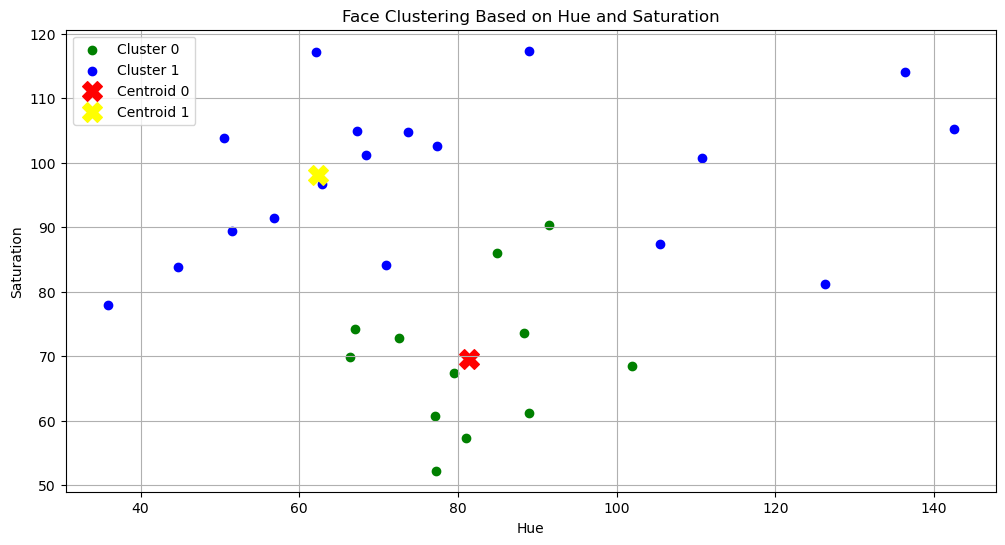

NameError: name 'plot_filename' is not defined

In [7]:
import wandb

# Initialize WandB
wandb.init(project="face-clustering", name="hue-saturation-clustering")

# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color='green', label="Cluster 0")

cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color='blue', label="Cluster 1")

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1
plt.scatter(centroid_0[0], centroid_0[1], color='red', marker='X', s=200, label="Centroid 0")
plt.scatter(centroid_1[0], centroid_1[1], color='yellow', marker='X', s=200, label="Centroid 1")

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Face Clustering Based on Hue and Saturation")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

# Save the plot as an image file

## Show the plot
plt.show()

# Log clustering results to WandB
wandb.log({
    "centroid_0_hue": centroid_0[0],
    "centroid_0_saturation": centroid_0[1],
    "centroid_1_hue": centroid_1[0],
    "centroid_1_saturation": centroid_1[1],
    "clustering_plot": wandb.Image(plot_filename)  # Log the scatter plot
})

# Finish the WandB run
wandb.finish()


In [8]:
import cv2
import wandb

# Initialize WandB
wandb.init(project="face-detection", name="template-image-detection")

## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Convert to grayscale for face detection
gray_template = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Load the Haar cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Detect face in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(gray_template, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Save the image with rectangles for WandB logging
detected_faces_filename = "detected_faces.png"
cv2.imwrite(detected_faces_filename, template_img)

# Show the image
# cv2.imshow("Detected Faces", template_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Log the detected image to WandB
wandb.log({
    "detected_faces": wandb.Image(detected_faces_filename),
    "num_faces_detected": len(template_faces)
})
# Finish WandB run
wandb.finish()

num_faces_detected,▁
num_faces_detected,1


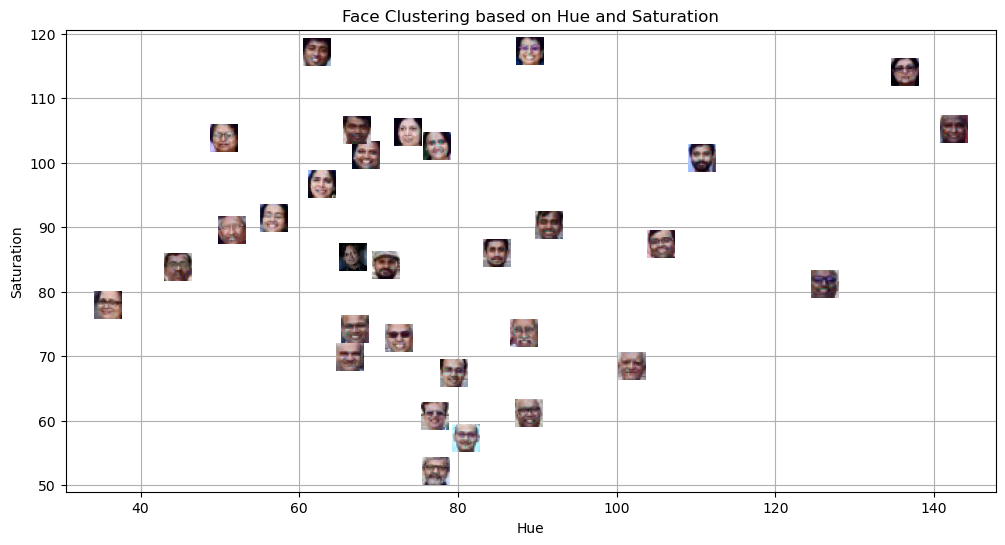

Template Label,▁
Template Label,1


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import wandb

# Initialize Weights and Biases
wandb.init(project="face-clustering", name="Dr_Shashi_Tharoor")

# Load the template image
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Convert the template image to HSV color space
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image
template_hue = np.mean(template_hsv[:, :, 0])  # Mean hue
template_saturation = np.mean(template_hsv[:, :, 1])  # Mean saturation

# Predict the cluster label for the template image
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
color = 'red' if template_label == 0 else 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

# Set labels, title, and grid
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Face Clustering based on Hue and Saturation")
plt.grid(True)

# Show plot
plt.show()

# Save template image as .jpg
cv2.imwrite("Dr_Shashi_Tharoor.jpg", template_img)

# Log template image and its cluster label to wandb
wandb.log({"Template Image": wandb.Image("Dr_Shashi_Tharoor.jpg", caption="Dr_Shashi_Tharoor"),
           "Template Label": template_label})

# Finish wandb run
wandb.finish()

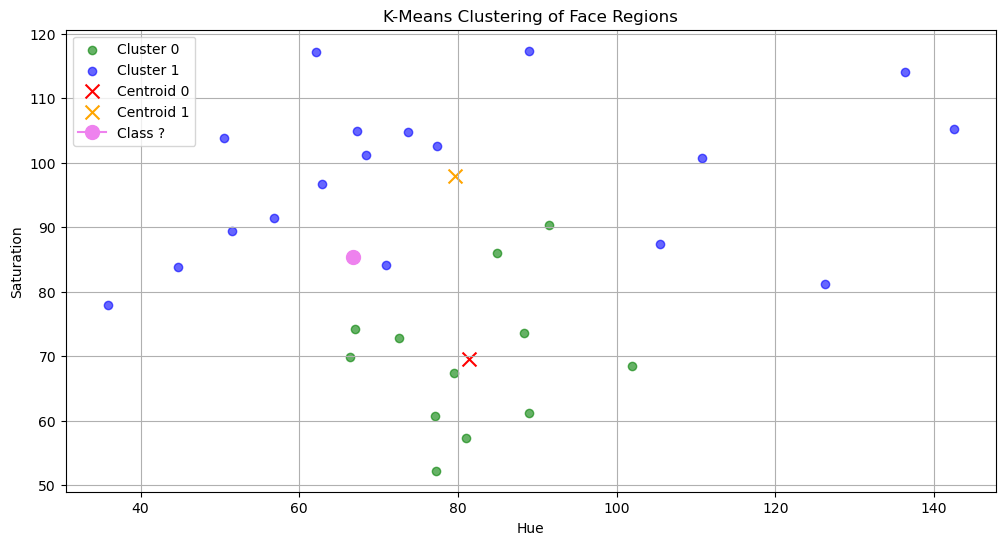

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import wandb

# Initialize Weights & Biases
wandb.init(project="kmeans-clustering")

# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Convert lists to numpy arrays
cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0', alpha=0.6)

# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1', alpha=0.6)

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='x', s=100, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='orange', marker='x', s=100, label='Centroid 1')

# Plot template hue and saturation
plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

# Add labels, title, legend, and grid
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('K-Means Clustering of Face Regions')
plt.legend()
plt.grid(True)

# Log plot to Weights & Biases
wandb.log({"K-Means Scatter Plot": wandb.Image(fig)})

# Show the plot
plt.show()


## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

1) Distance-based classification algorithms use different distance metrics to measure how similar data points are. The most common ones include Euclidean distance, which measures straight-line distance; Manhattan distance, which sums up absolute differences along axes; Minkowski distance, a general form of both Euclidean and Manhattan; and Cosine similarity, which measures angle-based similarity. The choice of distance metric depends on the dataset and problem requirements.

2) Distance-based classification methods, like K-Nearest Neighbors (KNN), are widely used in medical diagnosis to classify diseases based on symptoms, recommender systems for suggesting products based on user behavior, image recognition for grouping similar images, and anomaly detection in cybersecurity. These methods work well in cases where labeled data is available, and classifying new data points relies on their similarity to existing ones.

3) Different distance metrics serve different purposes. Euclidean distance is the most commonly used and works well when features are continuous. Manhattan distance is useful when movement is restricted to grid-like paths. Minkowski distance generalizes both Euclidean and Manhattan distances. Hamming distance is useful for categorical data. Cosine similarity helps in text and document classification, where measuring the angle between vectors is more relevant than measuring distance.

4) Cross-validation helps in evaluating how well a model will perform on new data. It splits the dataset into multiple training and testing sets, ensuring the model is tested on different data portions. This helps detect overfitting and underfitting. K-fold cross-validation is a common method where the dataset is divided into K parts, and the model is trained K times, each time using a different part for testing.

5) In KNN, bias refers to the error due to incorrect assumptions in the model. A high K value (more neighbors) increases bias, as the decision is influenced by distant points. Variance refers to sensitivity to small changes in the data. A low K value makes the model highly variable, as it relies on fewer points and can be easily affected by noise. A balanced K is needed for optimal performance.